In [115]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture

<h1>Aufgabe 1 a)</h1>

In [129]:
mean =[2,-2]
cov = [[0.9,0.2],[0.2,0.3]]

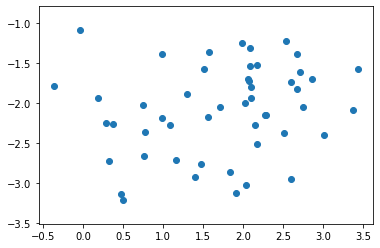

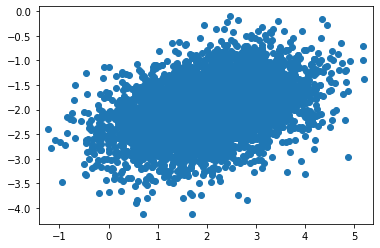

In [130]:
for n_samples in [50, 5000]: 
    X = np.random.multivariate_normal(mean,cov,n_samples)
    plt.scatter(X[:,0], X[:,1])
    plt.axis('equal')
    plt.show()

In [139]:
mean1 = np.mean(X,axis=0)
X_arr = np.array(X)

[ 2.02366971 -1.99065986]


In [137]:
C = np.cov(X_arr.T)
print(C)

[[0.90731195 0.20069214]
 [0.20069214 0.30582763]]


In [132]:
# C = np.zeros((2, 2))
# dC = np.zeros((2, 2))
# for x in X_arr:
#         d1 = (x[0] - mean1[0])
#         d2 = (x[1] - mean1[1])
#         dC = [[d1*d1, d1*d2],[d1*d2, d2*d2]]
#         C = np.add(C, dC)

# C = C/len(X_arr)
# print(C)
# print(len(X_arr))

[[0.90713049 0.200652  ]
 [0.200652   0.30576647]]
5000


<h1>Aufgabe 1 b)</h1>

In [196]:
mean1_exact = [0,0,0]
mean2_exact = [1,2,2]
mean3_exact = [3,3,4]
# cov = 0.8*np.identity(3)
cov = np.array([[0.8,0.2,0.1],[0.2,0.8,0.2],[0.1,0.2,0.8]])
n_samples = 999

In [197]:
D1 = np.random.multivariate_normal(mean1_exact,cov,int(n_samples/3))
D2 = np.random.multivariate_normal(mean2_exact,cov,int(n_samples/3))
D3 = np.random.multivariate_normal(mean3_exact,cov,int(n_samples/3))
D = np.concatenate((D1,D2,D3), axis=0)

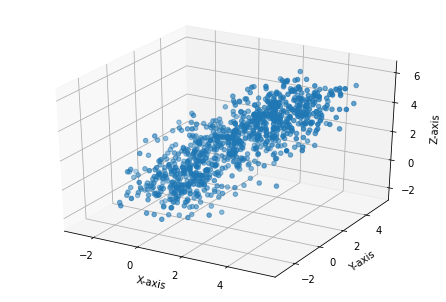

In [198]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(D[:,0], D[:,1],D[:,2])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

In [199]:
mean1 = np.mean(D1,axis=0)
Cov1 = np.cov(D1.T)
mean2 = np.mean(D2,axis=0)
Cov2 = np.cov(D2.T)
mean3 = np.mean(D3,axis=0)
Cov3 = np.cov(D3.T)
Cov_Common = (Cov1 + Cov2 + Cov3)/3
print(mean1)
print(mean2)
print(mean3)
print(Cov_Common)

[ 0.03736565 -0.0090895   0.0066802 ]
[1.10914596 2.0629689  2.01802866]
[2.98754557 2.90527288 3.9767011 ]
[[0.85394131 0.21357593 0.12857431]
 [0.21357593 0.82784044 0.23923504]
 [0.12857431 0.23923504 0.82828064]]


In [200]:
T1 = np.random.multivariate_normal(mean1_exact,cov,int(n_samples/3))
T2 = np.random.multivariate_normal(mean2_exact,cov,int(n_samples/3))
T3 = np.random.multivariate_normal(mean3_exact,cov,int(n_samples/3))
T = np.concatenate((T1,T2,T3), axis=0)

In [201]:
class_assing = []
n_correct = 0
for x in T:
    d1 = np.linalg.norm(x-mean1)
    d2 = np.linalg.norm(x-mean2)
    d3 = np.linalg.norm(x-mean3)

    m = min(d1,d2,d3)
    if m == d1:
        class_assing.append(1)
    elif m == d2:
        class_assing.append(2)
    elif m == d3:
        class_assing.append(3)

for i in range(len(class_assing)):
    if i < 333:
        if class_assing[i] == 1:
            n_correct +=1
    elif i >= 333 and  i < 666:
        if class_assing[i] == 2:
            n_correct +=1
    elif i >= 666 and  i < 999:
        if class_assing[i] == 3:
            n_correct +=1

correct_frac = n_correct/len(T)
print(correct_frac)

0.8898898898898899
